# 1. 데이터 수집
- 출처: 서울 열린 데이터 광장
- 데이터: 서울시 지하철 승하차 인원수 정보

In [4]:
import pandas as pd
df=pd.read_csv('./data/CARD_SUBWAY_MONTH_202501.csv',index_col=False)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250101,수인선,송도,1453,1321,20250104
1,20250101,4호선,창동,12477,13408,20250104
2,20250101,4호선,쌍문,12792,12199,20250104
3,20250101,4호선,수유(강북구청),17606,17442,20250104
4,20250101,4호선,미아(서울사이버대학),6819,6532,20250104
...,...,...,...,...,...,...
19124,20250131,수인선,남동인더스파크,1622,1748,20250203
19125,20250131,수인선,원인재,3834,3942,20250203
19126,20250131,수인선,연수,4170,4016,20250203
19127,20250131,수인선,송도,2076,1848,20250203


In [9]:
import warnings
warnings.filterwarnings('ignore')

# 2. EDA 
- 1. 월중 평균 이용자수 최다 역 top10
- 2. 요일별 이용자수 분석


## 2-1. 월중 평균이용자수 최다, 최저 역 

### 데이터 추출

In [ ]:
df['총승하차'] = df['승차총승객수'] + df['하차총승객수']
# 호선과 역 기준 평균값
station_avg = df.groupby(['노선명', '역명'])['총승하차'].mean().reset_index()

# 가장 붐비는 상위 10개 역
top10 = station_avg.sort_values(by='총승하차', ascending=False).head(10)
low10 = station_avg.sort_values(by='총승하차', ascending=True).head(10)

In [18]:
# 평균 이용자수 최다 역
top10

,노선명,역명,총승하차
10,2호선,강남,137566.322581
59,2호선,홍대입구,137253.096774
52,2호선,잠실(송파구청),135842.064516
2,1호선,서울역,117474.225806
14,2호선,구로디지털단지,95353.387097
37,2호선,신림,95244.064516
63,3호선,고속터미널,90438.774194
26,2호선,삼성(무역센터),88373.451613
36,2호선,신도림,87192.516129
30,2호선,선릉,84943.451613


In [22]:
low10

,노선명,역명,총승하차
400,경의선,검암,1.000000
406,경의선,김포공항,1.000000
401,경의선,계양,1.000000
197,6호선,신내,1.153846
591,일산선,지축,1.300000
202,6호선,연신내,2.259259
91,3호선,충무로,3.178571
503,분당선,복정,3.200000
393,경원선,창동,3.413793
417,경의선,운천,7.900000


### 데이터 시각화

In [10]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

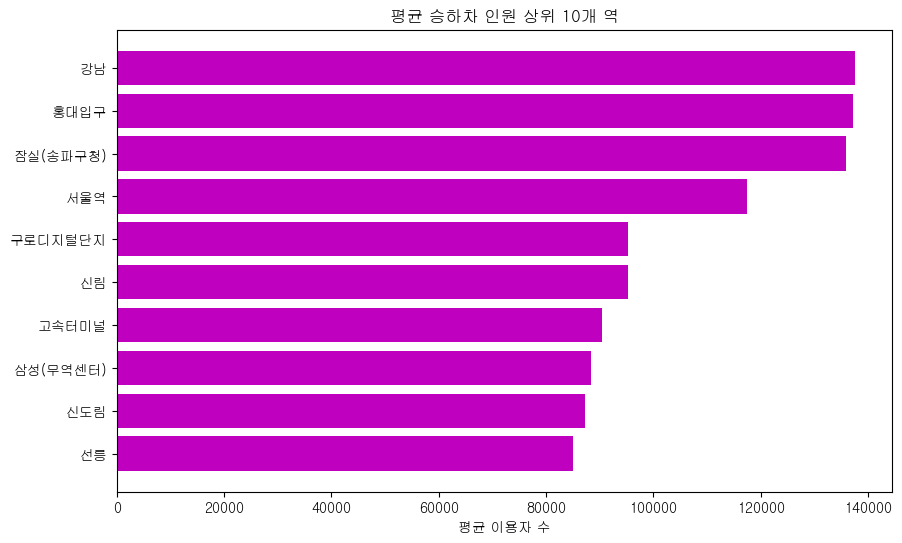

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10['역명'], top10['총승하차'], color='m')
plt.gca().invert_yaxis()
plt.title('평균 승하차 인원 상위 10개 역')
plt.xlabel('평균 이용자 수')
plt.show()


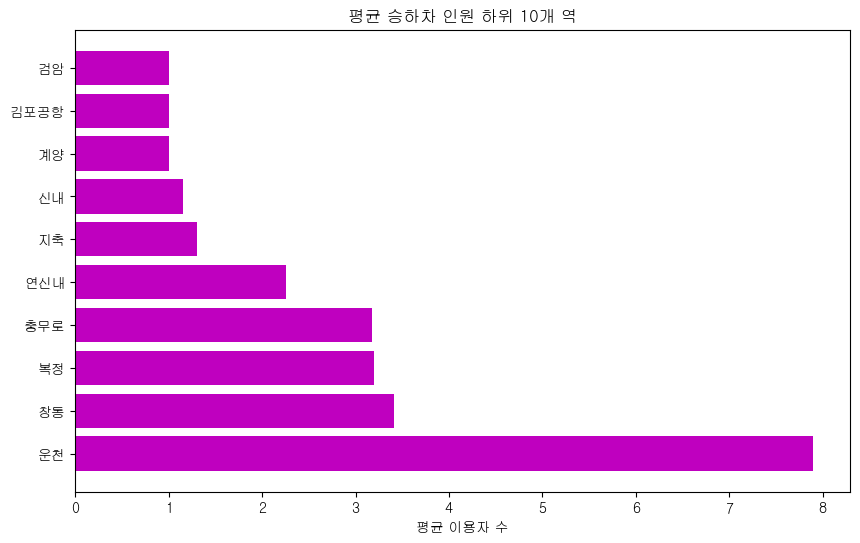

In [25]:
plt.figure(figsize=(10,6))
plt.barh(low10['역명'], low10['총승하차'], color='m')
plt.gca().invert_yaxis()
plt.title('평균 승하차 인원 하위 10개 역')
plt.xlabel('평균 이용자 수')
plt.show()

## 2-2. 요일별 이용자수 

### 데이터 추출

In [27]:
df['등록일자'] = pd.to_datetime(df['등록일자'], format='%Y%m%d')
df['요일'] = df['등록일자'].dt.dayofweek  # 월(0)~일(6)
df['주말여부'] = df['요일'].apply(lambda x: '주말' if x >= 5 else '평일')


In [32]:
dayp = df.groupby('요일')['총승하차'].mean().reset_index()
dayp['요일명'] = ['월', '화', '수', '목', '금', '토', '일']
dayp

,요일,총승하차,요일명
0,0,24024.377879,월
1,1,18086.721862,화
2,2,13132.207287,수
3,3,21053.668152,목
4,4,20489.964720,금
5,5,18235.298121,토
6,6,21020.370382,일


### 데이터 시각화

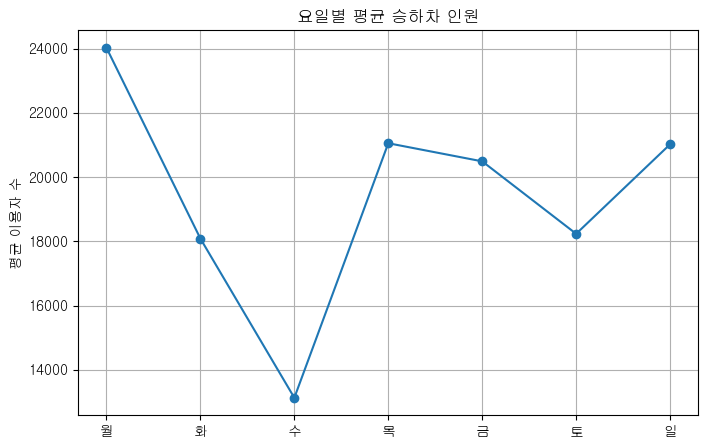

In [31]:
plt.figure(figsize=(8,5))
plt.plot(dayp['요일명'], dayp['총승하차'], marker='o')
plt.title('요일별 평균 승하차 인원')
plt.ylabel('평균 이용자 수')
plt.grid(True)
plt.show()


In [44]:
dayp1 = df.groupby(['요일','역명'])['총승하차'].mean().reset_index()
dayp1

,요일,역명,총승하차
0,0,4.19민주묘지,5775.8
1,0,가능,12409.2
2,0,가락시장,19940.8
3,0,가산디지털단지,66821.3
4,0,가양,46451.8
...,...,...,...
3691,6,회기,42109.6
3692,6,회룡,22840.4
3693,6,회현(남대문시장),48369.0
3694,6,효창공원앞,9407.0


In [46]:
dayp2=dayp1.sort_values(['역명','요일'])
dayp3= dayp2[dayp2['역명']=='강남']
dayp3['요일명'] = ['월', '화', '수', '목', '금', '토', '일']
dayp3

,요일,역명,총승하차,요일명
11,0,강남,183313.2,월
539,1,강남,123233.0,화
1067,2,강남,68575.5,수
1595,3,강남,154775.0,목
2123,4,강남,146247.0,금
2651,5,강남,123723.6,토
3179,6,강남,151610.0,일


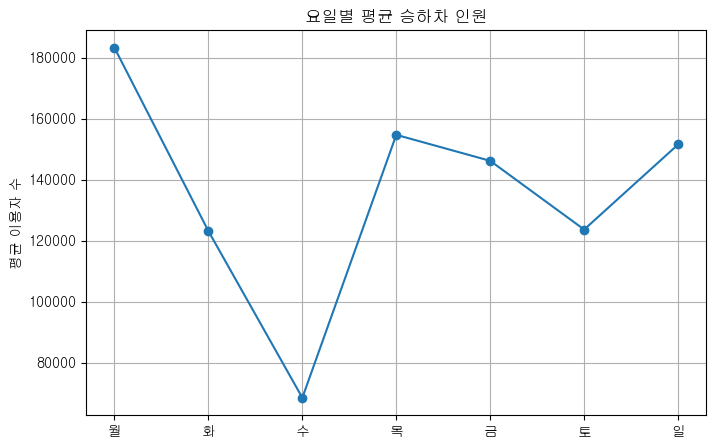

In [47]:
plt.figure(figsize=(8,5))
plt.plot(dayp3['요일명'], dayp3['총승하차'], marker='o')
plt.title('요일별 평균 승하차 인원')
plt.ylabel('평균 이용자 수')
plt.grid(True)
plt.show()
